# Example: Fit NHPP models

This notebook loads the bundled MUSA dataset and fits an exponential NHPP model.

In [1]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat.nhpp as srm

from pysrat.data import NHPPData

In [2]:
data = NHPPData.from_csv(
    resources.files("pysrat").joinpath("datasets/musa/sys1g.csv"),
    intervals='time', counts='fault')
data

NHPPData(kind='counts', len=96, total_faults=136, total_time=96)
----------------------------------------------------------
 idx  intervals   counts on_boundary
   0          1        1           0
   1          1        1           0
   2          1        0           0
   3          1        0           0
   4          1        0           0
   5          1        0           0
   6          1        0           0
   7          1        0           0
   8          1        1           0
   9          1        1           0
  10          1        2           0
  11          1        0           0
  12          1        0           0
  13          1        0           0
  14          1        0           0
  15          1        0           0
  16          1        1           0
  17          1        0           0
  18          1        0           0
  19          1        9           0
   ...
----------------------------------------------------------
mean=57.3015  max=92

In [7]:
data.truncate(t_end=11)

NHPPData(kind='counts', len=11, total_faults=6, total_time=11)
----------------------------------------------------------
 idx  intervals   counts on_boundary
   0          1        1           0
   1          1        1           0
   2          1        0           0
   3          1        0           0
   4          1        0           0
   5          1        0           0
   6          1        0           0
   7          1        0           0
   8          1        1           0
   9          1        1           0
  10          1        2           0
----------------------------------------------------------
mean=7.33333  max=11

In [7]:
models = {
    "Exponential": srm.ExponentialNHPP(),
    "Gamma": srm.GammaNHPP(),
    "Pareto2": srm.Pareto2NHPP(),
    "TruncatedNormal": srm.TruncatedNormalNHPP(),
    "LogNormal": srm.LogNormalNHPP(),
    "TruncatedLogistic": srm.TruncatedLogisticNHPP(),
    "LogLogistic": srm.LogLogisticNHPP(),
    "TruncatedExtremeValueMax": srm.TruncatedExtremeValueMaxNHPP(),
    "LogExtremeValueMax": srm.LogExtremeValueMaxNHPP(),
    "TruncatedExtremeValueMin": srm.TruncatedExtremeValueMinNHPP(),
    "LogExtremeValueMin": srm.LogExtremeValueMinNHPP(),
}
for model in models.values():
    model.fit(data, verbose=True)

/Users/okamu/Documents/pysrat/src/pysrat/nhpp/_em.py:231: UserWarning: Did not converge to MLE by max iteration.
  warnings.warn("Did not converge to MLE by max iteration.")
/Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [8]:
models['Exponential'].params_dict_

{'omega': 2010.0575831506876, 'rate': 0.0007271898285256212}

<Axes: xlabel='time', ylabel='# of faults'>

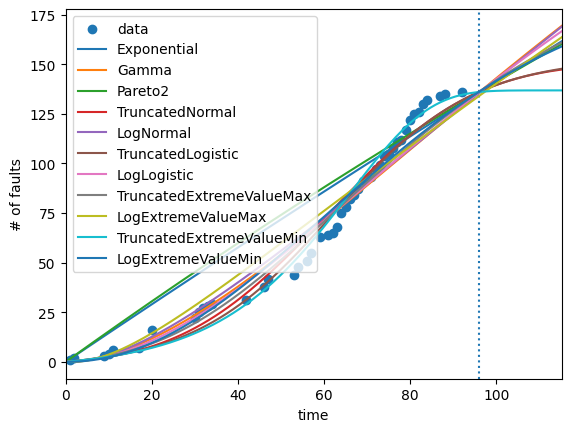

In [9]:
srm.plot_mvf(data, models)

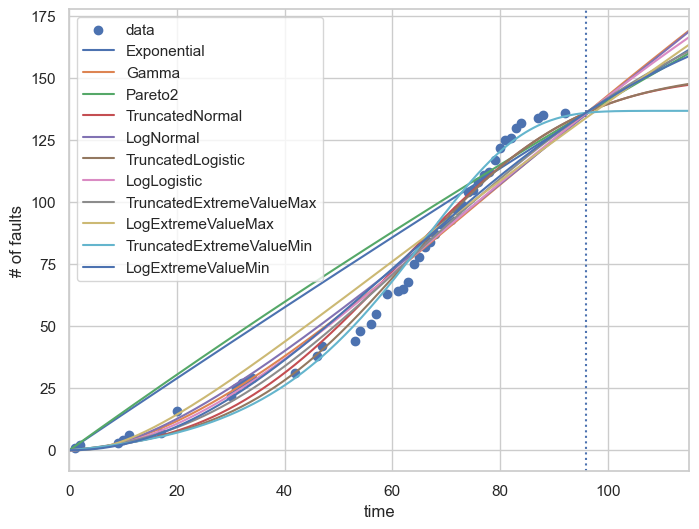

In [11]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
srm.plot_mvf(data, models, ax=ax)
plt.show()


<Axes: xlabel='time', ylabel='# of faults'>

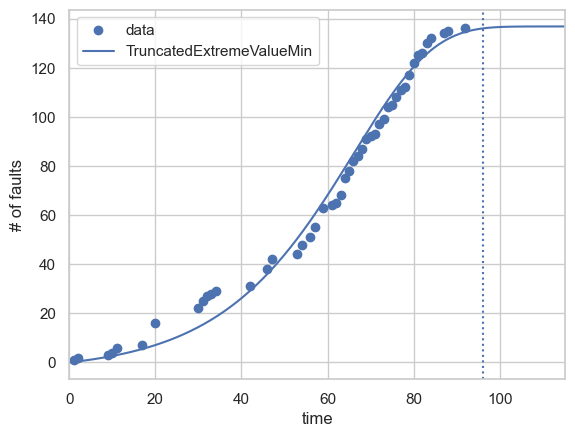

In [12]:
# select the best model by AIC with label
best_key = min(models, key=lambda k: models[k].aic_)
srm.plot_mvf(data, {best_key: models[best_key]})
